# Logistic Regression Model

和前面提到的 Linear Regression 一样， Logistic Regression 也属于 Generalized Linear Model。Logistic Regression 是 Linear Regression 很直接的扩展，Logistic Regression 把 Linear Regression 的结果送入到 sigmoid 函数中，计算得到结果。

## sigmoid 函数

$\begin{align*}
sigmoid(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{e^x + 1}
\end{align*}$

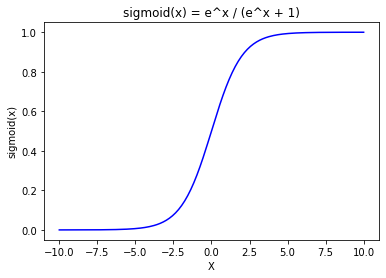

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.linspace(-10,10,200)
y = 1 / (1 + np.exp(-1 * x))
plt.plot(x, y, 'b', label='sigmoid(x) = e^x / (e^x + 1)')
plt.xlabel('X')
plt.ylabel('sigmoid(x)')
plt.title('sigmoid(x) = e^x / (e^x + 1)')
plt.show()
plt.close()

很多人常讲，Logistic Regression 最后得到的结果是一个概率值。这个值真的是概率值么？指数分布簇可以给我们答案。

## Exponential Family

单一变量的 exponential family 是 $f(x|\theta)=h(x)e^{\eta(\theta)T(x)-A(\theta)}$

其中 $\eta(\theta)$ 是自然参数，在 Bernoulli 分布中，只有一个自然参数，那就是 $p$。另外的，$A(\theta)$ 可以表示成 $A(\theta) = f(\eta(\theta))$ 的形式。

如果 $x \sim Bernoulli(x|p) = p^x(1-p)^{1-x}$，那么就有：

$
\begin{align*}
Bernoulli(x|p) & = p^x(1-p)^{1-x} \\
& = e^{log(p^x(1-p)^{1-x})} \\
& = e^{xlog(p) + (1-x)log(1-p)} \\ 
& = e^{xlog(\frac{p}{1-p}) + log(1-p)}
\end{align*}
$

对应指数分布簇，即有 $h(x)=1$，$\eta(\theta)=log(\frac{p}{1-p})$，$T(x)=x$，$A(\theta)=-log(1-p)$。稍微对 p 做一些分析：

$
\begin{align*}
\eta(\theta) & = log(\frac{p}{1-p}) \\
\Rightarrow e^{\eta(\theta)} \cdot (1-p) & = p \\
e^{\eta(\theta)} & = p(1 + e^{\eta(\theta)}) \\
\frac{e^{\eta(\theta)}}{1+e^{\eta(\theta)}} & = p 
\end{align*}
$

所以，如果使用 $\eta(\theta)) = \mathbf{\theta}^T \mathbf{x}$，那么 $p = \frac{1}{1+e^{-\theta^T x}}$，所以有人会说 Logistic Regression 的输出是一个概率值。在传统的 Statistical Machine Learning 中，通过预先选择一个模型，然后根据数据，学习出模型的参数值。过去的一段时间内，我一度认为 Logistic Regression 的输出值，不能代表概率值，其实是部分正确的，如果说 $\eta(\theta)=\mathbf{\theta}^T \mathbf{x}$ 能真实的反映 $\eta(\theta)$ 函数，那么 $p$ 的值就是概率值；否则就不行。

类似于 Linear Regression，要通过训练数据获取 $\theta$ 的值，也需要类似的两步，设置 Loss 和使用 Learning Method。在 Logistic Regression 中，常用的损失函数称为 logloss 或者 Cross-Entropy，两者分别是 Statistics 和 Information Theory 视角的表述。

## logloss

简单的做一个推导

$
\begin{align*}
{logloss}_i = - [y_i \cdot log(\hat{y_i}) + (1 - y_i) \cdot log(1 - \hat{y_i})]
\end{align*}
$

这样的话，如果 $y_i=0$，那么只有 $(1 - y_i) \cdot log(1 - \hat{y_i})$ 生效，且 $\hat{y_i}$ 要趋近于 0 才能使得 loss 最小；如果 $y_i=1$，那么只有 $y_i \cdot log(\hat{y_i})$ 生效，且 $\hat{y_i}$ 要趋近于 1 才能使 loss 最小。

$
\begin{align*}
logloss & = - \frac{1}{N} \sum_i^N [y_i \cdot log(\hat{y_i}) + (1 - y_i) \cdot log(1 - \hat{y_i})] \\
& \Rightarrow - \frac{1}{N} \sum_i^N  [y_i \cdot log (\frac{e^{\theta^T \mathbf{x_i}}}{1 + e^{\theta^T \mathbf{x_i}}}) + log (\frac{1}{1 + e^{\theta^T \mathbf{x_i}}}) - y \cdot log (\frac{1}{1 + e^{\theta^T \mathbf{x_i}}})] \\
& = - \frac{1}{N} \sum_i^N [y_i \cdot (\theta^T \mathbf{x_i}) - y_i \cdot log(1 + e^{\theta^T \mathbf{x_i}}) - log(1 + e^{\theta^T \mathbf{x_i}}) + y_i \cdot log(1 + e^{\theta^T \mathbf{x_i}})]\\
& = - \frac{1}{N} \sum_i^N [y_i \cdot (\theta^T \mathbf{x_i}) - log(1 + e^{\theta^T \mathbf{x_i}})]
\end{align*}
$


对于某一个参数 $\theta_i$，计算 gradient：

$
\begin{align*}
\frac{\partial loss}{\theta_i} & = - \frac{1}{N} \sum_i^N (y_i \cdot x_i - \frac{e^{\theta^T \mathbf{x_i}}}{1 + e^{\theta^T \mathbf{x_i}}} x_i) \\
& = - \frac{1}{N} \sum_i^N (y_i \cdot x_i - \hat{y_i} \cdot x_i) = \frac{1}{N} \sum_i^N (y_i - \hat{y_i}) x_i
\end{align*}
$

## Entropy

Entropy 用来度量信息中的信息量，一般的用法是：

$
\begin{align*}
H(X) & = - \sum_{x \in \mathcal{X}} p(x) log(p(x)) \\
0 \cdot log(0) & = 0 
\end{align*}
$

Entropy 具有的特点：

* 非负，即 $H(x) \geq 0$
* 对称
* 确定，即 $p(x)=0$ 或者 $p(x)=1$ 时，$H(x) = 0$
* 极值，即 $H(x)$ 是 $p$ 上的 Convex Function，在 $p=0.5$ 处取得极大值

把 Entropy 的表示和 logloss 对比一下就会发现很相近，只是 $log$ 里面的部分换成了预测的 $\hat{y}$，这样的变化使得原来的 Entropy 变成了 Cross-Entropy，Cross-Entropy 用于衡量两个分布的差异性。这就要提到另一个东西，KL Divergence：$D(p||q)=H(p,q) - H(p)$，如果两个分布 $p,q$ 一致，那么 $D(p||q) = 0$。

$
\begin{align*}
D(p||q) & = \sum_i^N p_i log \frac{p_i}{q_i} \\
& = \sum_i^N p_i (log(p_i) - log(q_i)) \\
& = - \sum_i^N p_i log(q_i) - (- \sum_i^N p_i log(p_i)) \\
& = H(p,q) - H(p)
\end{align*}
$

如果 $p$ 和 $q$ 的两个分布差距很大，那么 $D(p||q)$ 的差距也很大。$D(p||q)$ 还有两个特点：

* 非对称性
* $D(p||q) \geq 0$ 

## 一点点代码

使用 iris 数据集来进行 Logistic Regression 的示例。

In [85]:
# numpy
import numpy as np
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

index = np.where(y < 2)

X = X[index]
y = y[index]

X = np.c_[X, np.ones(len(index[0]))]

In [106]:
# numpy
np_theta = np.random.randn(X.shape[1], 1)
LEARNING_RATE = 1e-6

BATCH_SIZE = 16
EPOCH = 100000
PRINT_STEP = EPOCH / 10

for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=BATCH_SIZE)
    sample_x = X[index].reshape(X.shape[1], BATCH_SIZE)
    sample_y = y[index]

    y_pred = 1 / (1 + np.exp(-1 * np.dot(np_theta.T, sample_x)))
    logloss = -1 * np.sum(np.multiply(sample_y, np.log(y_pred)) + np.multiply((1 - sample_y), np.log(1 - y_pred))) / BATCH_SIZE

    o = np.sum(np.multiply(sample_y - y_pred, sample_x), 1).reshape(X.shape[1], 1)
    np_theta -= -1 * LEARNING_RATE * o / BATCH_SIZE

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, logloss))

print(np_theta)

EPOCH: 0, loss: 3.642977
EPOCH: 10000, loss: 3.720024
EPOCH: 20000, loss: 3.765869
EPOCH: 30000, loss: 0.944655
EPOCH: 40000, loss: 3.690186
EPOCH: 50000, loss: 3.721614
EPOCH: 60000, loss: 3.134786
EPOCH: 70000, loss: 3.146695
EPOCH: 80000, loss: 3.340152
EPOCH: 90000, loss: 3.737028
[[ 0.99064697]
 [ 0.36320807]
 [ 0.70680409]
 [-0.20558825]
 [ 0.51484025]]


In [121]:
# PyTorch

import torch

device = torch.device('cpu')
dtype = torch.double

INPUT_DIMENSION, OUTPUT_DIMENSION = X.shape[1], 1

theta = torch.randn(INPUT_DIMENSION, OUTPUT_DIMENSION, device=device, dtype=dtype, requires_grad=True)
LEARNING_RATE = 1e-6

BATCH_SIZE = 16
EPOCH = 30000
PRINT_STEP = EPOCH / 10

for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=BATCH_SIZE)
    sample_x = torch.from_numpy(X[index]).reshape(INPUT_DIMENSION, BATCH_SIZE)
    sample_y = torch.from_numpy(y[index])

    y_pred = 1 / (1 + torch.exp(-1 * theta.T.mm(sample_x)))
    logloss = -1 * torch.sum(torch.mul(sample_y, torch.log(y_pred)) + torch.mul((1 - sample_y), torch.log(1 - y_pred))) / BATCH_SIZE

    logloss.backward()

    with torch.no_grad():
        theta -= LEARNING_RATE * theta.grad

        # Manually zero the gradients after updating weights
        theta.grad.zero_()

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, logloss))

print(theta)

EPOCH: 0, loss: 1.943744
EPOCH: 3000, loss: 1.825467
EPOCH: 6000, loss: 2.224472
EPOCH: 9000, loss: 2.207126
EPOCH: 12000, loss: 3.221605
EPOCH: 15000, loss: 1.260543
EPOCH: 18000, loss: 2.440658
EPOCH: 21000, loss: 2.855306
EPOCH: 24000, loss: 2.903063
EPOCH: 27000, loss: 3.678870
tensor([[-0.3144],
        [-1.0587],
        [-0.0368],
        [ 1.5112],
        [ 0.8232]], dtype=torch.float64, requires_grad=True)


## AUC

评价 Logistic Regression 建模的好坏，可以使用 AUC 指标，AUC 的值越接近于 1 越好。以后会详细的总结 AUC 是如何计算出来的。

In [122]:
# numpy score

np_score = 1 / (1 + np.exp(-1 * np.dot(np_theta.T, X.T)))
py_theta = theta.detach().numpy()
py_score = 1 / (1 + np.exp(-1 * np.dot(py_theta.T, X.T)))

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y, np_score.T)
print('numpy version auc is %f' % metrics.auc(fpr,tpr))

fpr, tpr, thresholds = metrics.roc_curve(y, py_score.T)
print('PyTorch version auc is %f' % metrics.auc(fpr,tpr))

numpy version auc is 0.993200
PyTorch version auc is 0.999600


## 瞎 BB 几句

Logistic Regression 有很多的应用，比如用来预测美国大选大家投的是民主党还是共和党，比如在医学上有人用于受伤的人是否要死了，比如在广告中用来预测这个广告是否要投放给某个人，比如在营销中用于判断某个人是否会订阅或者购买某个产品，亦如判断一个肿瘤是良性的还是恶性的。所有这里提到的例子，都是建立起一个一组变量表达的二元标签之间的关系。

Logistic Regression 是一个很简单的模型，但也是很有效的模型，至今在很多的项目中使用到了 Logistic Regression ，不过现在的用法不是那么的简单和直接，人们会花费更多的时间构建数据的表示上。这里第一次提到数据的表示，需要多说几句。不同的数据表示对于模型的构建影响很大，例如有的数据集在 Polar 坐标系下仅仅用简单的直线就可以分开，但是在 Cartesian 坐标系下却需要使用圆才能分开。这样的话，前者只需要构建一个线性的模型，但是后者需要构建一个非线性模型。人们在线性模型的构建上积累了很多的知识、经验、方法，但面对非线性的问题的时候，常常束手无策。所以数据的表示成为了现在工程实践中一个很重要的步骤，这个步骤再加上额外的一些对数据的处理（例如去除噪声点、插值、数据标准化等），就构成了人们口中常说的 **Feature Engineering**。

特征工程加上简单模型是过去以至于现在很多问题的主流处理方法。不过到现在位置，这些内容还不涉及 **Feature Engineering**。